In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('database/email_phishing_data.csv')  # Replace with your actual filename

In [5]:
X = df.drop('label', axis=1)  # All columns except 'label'
y = df['label']               # Target column


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
print(y.value_counts(normalize=True))  # Percent of each class


label
0    0.98676
1    0.01324
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5348800284527545
Precision: 0.02173854592385459
Recall: 0.7755395683453238
F1 Score: 0.04229164759575776
Confusion Matrix:
 [[82602 72767]
 [  468  1617]]


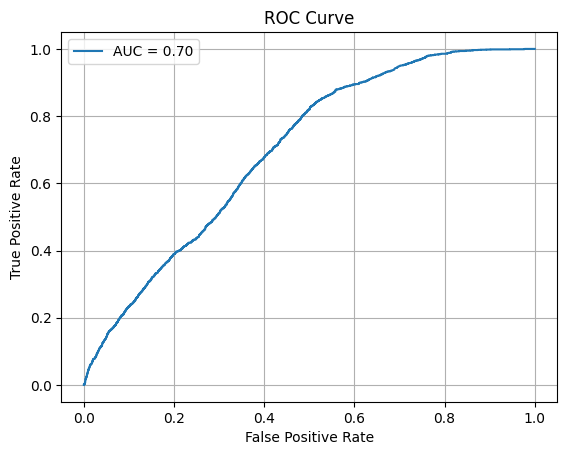

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


learnings:
had to used balanced way to approach logiticalregression or else it just marks all mails as not phishing 
had a lot of false positives
Accuracy: 0.5348800284527545
Precision: 0.02173854592385459
Recall: 0.7755395683453238
F1 Score: 0.04229164759575776
Confusion Matrix:
 [[82602 72767]
 [  468  1617]]